# A Primer on Python for Statistical Programming and Data Science

### Chris Fonnesbeck
Senior Quantitative Analyst, The New York Yankees

---

![python](http://imgs.xkcd.com/comics/python.png)

(via [xkcd](http://imgs.xkcd.com/comics/python.png))

## What is Python?

Python is a modern, open source, object-oriented programming language, created by a Dutch programmer, Guido van Rossum. Officially, it is an **interpreted** scripting language (meaning that it is not compiled until it is run) for the C programming language; in fact, Python itself is coded in C (though there are other non-C implementations). Frequently, it is compared to languages like Perl and Ruby. It offers the power and flexibility of lower level (*i.e.* compiled) languages, without the steep learning curve, and without most of the associated programming overhead. The language is very clean and readable, and it is available for almost every modern computing platform.


## Why use Python for scientific programming?

Python offers a number of advantages to scientists, both for experienced and novice programmers alike:

### Powerful and easy to use

Python is simultaneously powerful, flexible and easy to learn and use (in general, these qualities are traded off for a given programming language). Anything that can be coded in C, FORTRAN, or Java can be done in Python, almost always in fewer lines of code, and with fewer debugging headaches. Its standard library is extremely rich, including modules for string manipulation, regular expressions, file compression, mathematics, profiling and debugging (to name only a few). Unnecessary language constructs, such as `END` statements and brackets are absent, making the code terse, efficient, and easy to read. Finally, Python is object-oriented, which is an important programming paradigm particularly well-suited to scientific programming, which allows data structures to be abstracted in a natural way.

> Python is a language that is very powerful for developers, but is also accessible to Astronomers
-- Perry Greenfield

### Interactive

Python may be run interactively on the command line, in much the same way as Octave or S-Plus/R. Rather than compiling and running a particular program, commands may entered serially followed by the `Return` key. This is often useful for mathematical programming and debugging.

### Extensible

Python is often referred to as a “glue” language, meaning that it is a useful in a mixed-language environment. Frequently, programmers must interact with colleagues that operate in other programming languages, or use significant quantities of legacy code that would be problematic or expensive to re-code. Python was designed to interact with other programming languages, and in many cases C or FORTRAN code can be compiled directly into Python programs (using packages such as `f2py` or `cython`). Additionally, since Python is an interpreted language, it can sometimes be slow relative to its compiled cousins. In many cases this performance deficit is due to a short loop of code that runs thousands or millions of times. Such bottlenecks may be removed by coding a function in FORTRAN, C or Cython, and compiling it into a Python module.

### Third-party modules

There is a vast body of Python modules created outside the auspices of the Python Software Foundation. These include utilities for database connectivity, mathematics, statistics, and charting/plotting. Some notables include:

* ***NumPy***: Numerical Python (NumPy) is a set of extensions that provides the ability to specify and manipulate array data structures. It provides array manipulation and computational capabilities similar to those found in Matlab or Octave. 
* ***SciPy***: An open source library of scientific tools for Python, SciPy supplements the NumPy module. SciPy gathering a variety of high level science and engineering modules together as a single package. SciPy includes modules for graphics and plotting, optimization, integration, special functions, signal and image processing, genetic algorithms, ODE solvers, and others.
* ***Matplotlib***: Matplotlib is a python 2D plotting library which produces publication-quality figures in a variety of hardcopy formats and interactive environments across platforms. Its syntax is very similar to Matlab. 
* ***Pandas***: A module that provides high-performance, easy-to-use data structures and data analysis tools. In particular, the `DataFrame` class is useful for spreadsheet-like representation and mannipulation of data. Also includes high-level plotting functionality.
* ***IPython***: An enhanced Python shell, designed to increase the efficiency and usability of coding, testing and debugging Python. It includes both a Qt-based console and an interactive HTML notebook interface, both of which feature multiline editing, interactive plotting and syntax highlighting.

![](images/ecosystem.png)


### Plays well with others

Interoperability, glue language

### Free and open 

Python is released on all platforms under an open license (Python Software Foundation License), meaning that the language and its source is freely distributable. Not only does this keep costs down for scientists and universities operating  under a limited budget, but it also frees programmers from licensing concerns for any software they may develop. There is little reason to buy expensive licenses for software such as Matlab or Maple, when Python can provide the same functionality for free!


## Language Characteristics

# Example: Survival Analysis

In [1]:
import pymc3 as pm

/home/fonnesbeck/anaconda3/envs/dev/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/fonnesbeck/anaconda3/envs/dev/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


## Loading libraries

We use the **import** statement to load non-core modules into our Python environment. Packages with long names can be **aliased** to shorter names.

In [3]:
import numpy as np
import pandas as pd
import pymc3 as pm
# from matplotlib import pyplot as plt

/home/fonnesbeck/anaconda3/envs/dev/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/fonnesbeck/anaconda3/envs/dev/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [1]:
import numpy

Importing a library is like getting a piece of lab equipment out of a storage locker
and setting it up on the bench. Libraries provide additional functionality to the basic Python package, much like a new piece of equipment adds functionality to a lab space.
Once you've loaded the library,
we can ask the library to read our data file for us:

In [2]:
numpy.loadtxt(fname='../data/inflammation-01.csv', delimiter=',')

array([[ 0.,  0.,  1., ...,  3.,  0.,  0.],
       [ 0.,  1.,  2., ...,  1.,  0.,  1.],
       [ 0.,  1.,  1., ...,  2.,  1.,  1.],
       ..., 
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  0.,  0., ...,  0.,  2.,  0.],
       [ 0.,  0.,  1., ...,  1.,  1.,  0.]])

The expression `numpy.loadtxt()` is a **function call**
that asks Python to run the function `loadtxt` that belongs to the `numpy` library.
This **dotted notation** is used everywhere in Python
to refer to the parts of things as `thing.component`.

`numpy.loadtxt` has two **parameters**:
the name of the file we want to read,
and the **delimiter** that separates values on a line.
These both need to be character strings (or **strings** for short),
so we put them in quotes.

When we are finished typing and press `Shift+Enter`,
the notebook runs our command.
Since we haven't told it to do anything else with the function's output,
the notebook displays it.
In this case,
that output is the data we just loaded.
By default,
only a few rows and columns are shown
(with `...` to omit elements when displaying big arrays).
To save space,
Python displays numbers as `1.` instead of `1.0`
when there's nothing interesting after the decimal point.

## Variables

Our call to `numpy.loadtxt` read our file,
but didn't save the data in memory.
To do that,
we need to **assign** the array to a **variable**.
A variable is just a name for a value,
such as `x`, `current_temperature`, or `subject_id`.
Python's variables must begin with a letter and are **case sensitive**.
We can create a new variable by assigning a value to it using `=`.
As an illustration,
let's step back and instead of considering a table of data,
consider the simplest "collection" of data,
a single value.
The line below assigns the value `55` to a variable `weight_kg`:

In [3]:
weight_kg = 55

Once a variable has a value, we can print it to the screen:

In [4]:
weight_kg

55

and do arithmetic with it:

In [5]:
print('weight in pounds:', 2.2 * weight_kg)

weight in pounds: 121.00000000000001


We can also change a variable's value by assigning it a new one:

In [6]:
weight_kg = 57.5
print('weight in kilograms is now:', weight_kg)

weight in kilograms is now: 57.5


As the example above shows,
we can print several things at once by separating them with commas.

If we imagine the variable as a sticky note with a name written on it,
assignment is like putting the sticky note on a particular value:

![Variables as Sticky Notes](http://d.pr/i/1aepR/5d4vZGwE+)

This means that assigning a value to one variable does *not* change the values of other variables.
For example,
let's store the subject's weight in pounds in a variable:

In [7]:
weight_lb = 2.2 * weight_kg
print('weight in kilograms:', weight_kg, 'and in pounds:', weight_lb)

weight in kilograms: 57.5 and in pounds: 126.50000000000001


![Creating Another Variable](http://d.pr/i/qQv2/66X3U4qs+)

and then change `weight_kg`:

In [8]:
weight_kg = 100.0
print('weight in kilograms is now:', weight_kg, 'and weight in pounds is still:', weight_lb)

weight in kilograms is now: 100.0 and weight in pounds is still: 126.50000000000001


![Updating a Variable](http://d.pr/i/1hWyT/41TOzr7o+)

Since `weight_lb` doesn't "remember" where its value came from,
it isn't automatically updated when `weight_kg` changes.
This is different from the way spreadsheets work.

Just as we can assign a single value to a variable, we can also assign an array of values
to a variable using the same syntax.  Let's re-run `numpy.loadtxt` and save its result:

In [9]:
data = numpy.loadtxt(fname='../data/inflammation-01.csv', delimiter=',')

This statement doesn't produce any output because assignment doesn't display anything.
If we want to check that our data has been loaded,
we can print the variable's value:

In [10]:
data

array([[ 0.,  0.,  1., ...,  3.,  0.,  0.],
       [ 0.,  1.,  2., ...,  1.,  0.,  1.],
       [ 0.,  1.,  1., ...,  2.,  1.,  1.],
       ..., 
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  0.,  0., ...,  0.,  2.,  0.],
       [ 0.,  0.,  1., ...,  1.,  1.,  0.]])

Now that our data is in memory,
we can start doing things with it.
First,
let's ask what **type** of thing `data` refers to:

In [11]:
type(data)

numpy.ndarray

The output tells us that `data` currently refers to an **n-dimensional array** created by the NumPy library. These data corresponds to arthritis patient's inflammation. The rows are the individual patients and the columns are there daily inflammation measurements.

We can see what its **shape** is like this:

In [12]:
data.shape

(60, 40)

This tells us that `data` has 60 rows and 40 columns. When we created the
variable `data` to store our arthritis data, we didn't just create the array, we also
created information about the array, called 
**attributes**. This extra information describes `data` in
the same way an adjective describes a noun.
`data.shape` is an attribute  of `data` which described the dimensions of `data`.
We use the same dotted notation for the attributes of variables
that we use for the functions in libraries
because they have the same part-and-whole relationship.

If we want to get a single number from the array,
we must provide an **index** in square brackets,
just as we do in math:

In [13]:
data[0, 0]

0.0

In [14]:
data[30, 20]

13.0

The expression `data[30, 20]` may not surprise you,
but `data[0, 0]` might.
Programming languages like Fortran and MATLAB start counting at 1,
because that's what human beings have done for thousands of years.
Languages in the C family (including C++, Java, Perl, and Python) count from 0
because that's simpler for computers to do.
As a result,
if we have an M&times;N array in Python,
its indices go from 0 to M-1 on the first axis
and 0 to N-1 on the second.
It takes a bit of getting used to,
but one way to remember the rule is that
the index is ***how many steps we have to take from the start to get the item we want***.


An index like `[30, 20]` selects a single element of an array,
but we can select whole sections as well.
For example,
we can select the first ten days (columns) of values
for the first four patients (rows) like this:

In [15]:
data[0:4, 0:10]

array([[ 0.,  0.,  1.,  3.,  1.,  2.,  4.,  7.,  8.,  3.],
       [ 0.,  1.,  2.,  1.,  2.,  1.,  3.,  2.,  2.,  6.],
       [ 0.,  1.,  1.,  3.,  3.,  2.,  6.,  2.,  5.,  9.],
       [ 0.,  0.,  2.,  0.,  4.,  2.,  2.,  1.,  6.,  7.]])

The **slice** `0:4` means,
***"Start at index 0 and go up to, but not including, index 4."***
Again,
the up-to-but-not-including takes a bit of getting used to,
but the rule is that the difference between the upper and lower bounds is the number of values in the slice.

We don't have to start slices at 0:

In [16]:
print(data[5:10, 0:10])

[[ 0.  0.  1.  2.  2.  4.  2.  1.  6.  4.]
 [ 0.  0.  2.  2.  4.  2.  2.  5.  5.  8.]
 [ 0.  0.  1.  2.  3.  1.  2.  3.  5.  3.]
 [ 0.  0.  0.  3.  1.  5.  6.  5.  5.  8.]
 [ 0.  1.  1.  2.  1.  3.  5.  3.  5.  8.]]


We also don't have to include the upper and lower bound on the slice.
If we don't include the lower bound,
Python uses 0 by default;
if we don't include the upper,
the slice runs to the end of the axis,
and if we don't include either
(i.e., if we just use ':' on its own),
the slice includes everything:

In [17]:
small = data[:3, 36:]
print('small is:')
small

small is:


array([[ 2.,  3.,  0.,  0.],
       [ 1.,  1.,  0.,  1.],
       [ 2.,  2.,  1.,  1.]])

Arrays also know how to perform common mathematical operations on their values.
The simplest operations with data are arithmetic:
add, subtract, multiply, and divide.
 When you do such operations on arrays,
the operation is done **element-wise** on the array.
Thus:

In [18]:
doubledata = data * 2.0

will create a new array `doubledata`
whose elements have the value of two times the value of the corresponding elements in `data`:

In [19]:
print('original:')
data[:3, 36:]

original:


array([[ 2.,  3.,  0.,  0.],
       [ 1.,  1.,  0.,  1.],
       [ 2.,  2.,  1.,  1.]])

In [20]:
print('doubledata:')
doubledata[:3, 36:]

doubledata:


array([[ 4.,  6.,  0.,  0.],
       [ 2.,  2.,  0.,  2.],
       [ 4.,  4.,  2.,  2.]])

If,
instead of taking an array and doing arithmetic with a single value (as above)
you did the arithmetic operation with another array of the same shape,
the operation will be done on corresponding elements of the two arrays.
Thus:

In [21]:
tripledata = doubledata + data

will give you an array where `tripledata[0,0]` will equal `doubledata[0,0]` plus `data[0,0]`,
and so on for all other elements of the arrays.

In [22]:
print('tripledata:')
tripledata[:3, 36:]

tripledata:


array([[ 6.,  9.,  0.,  0.],
       [ 3.,  3.,  0.,  3.],
       [ 6.,  6.,  3.,  3.]])

Often, we want to do more than add, subtract, multiply, and divide values of data.
Arrays also know how to do more complex operations on their values.
If we want to find the average inflammation for all patients on all days,
for example,
we can just ask the array for its mean value

In [23]:
data.mean()

6.1487499999999997

`mean` is a **method** of the array.
A method is simply a function that is an attribute of the array,
in the same way that the member `shape` does.
If variables are nouns, methods are verbs:
they are what the thing in question knows how to do.
We need empty parentheses for `data.mean()`,
even when we're not passing in any parameters,
to tell Python to go and do something for us. `data.shape` doesn't
need `()` because it is just a description but `data.mean()` requires the `()`
because it is an action.

NumPy arrays have lots of useful methods:

In [24]:
print('maximum inflammation:', data.max())
print('minimum inflammation:', data.min())
print('standard deviation:', data.std())

maximum inflammation: 20.0
minimum inflammation: 0.0
standard deviation: 4.61383319712


When analyzing data,
though,
we often want to look at partial statistics,
such as the maximum value per patient
or the average value per day.
One way to do this is to create a new temporary array of the data we want,
then ask it to do the calculation:

In [25]:
patient_0 = data[0, :] # 0 on the first axis, everything on the second

print('maximum inflammation for patient 0:', patient_0.max())

maximum inflammation for patient 0: 18.0


We don't actually need to store the row in a variable of its own.
Instead, we can combine the selection and the method call:

In [26]:
print('maximum inflammation for patient 2:', data[2, :].max())

maximum inflammation for patient 2: 19.0


What if we need the maximum inflammation for *all* patients (as in the
next diagram on the left), or the average for each day (as in the
diagram on the right)? As the diagram below shows, we want to perform the
operation across an axis:

![Operations Across Axes](http://d.pr/i/1h4jI/1M2mkMgQ+)

To support this,
most array methods allow us to specify the axis we want to be **consumed** by the operation.
If we ask for the average across axis 0 (rows in our 2D example),
we get:

In [27]:
data.mean(axis=0)

array([  0.        ,   0.45      ,   1.11666667,   1.75      ,
         2.43333333,   3.15      ,   3.8       ,   3.88333333,
         5.23333333,   5.51666667,   5.95      ,   5.9       ,
         8.35      ,   7.73333333,   8.36666667,   9.5       ,
         9.58333333,  10.63333333,  11.56666667,  12.35      ,
        13.25      ,  11.96666667,  11.03333333,  10.16666667,
        10.        ,   8.66666667,   9.15      ,   7.25      ,
         7.33333333,   6.58333333,   6.06666667,   5.95      ,
         5.11666667,   3.6       ,   3.3       ,   3.56666667,
         2.48333333,   1.5       ,   1.13333333,   0.56666667])

As a quick check,
we can ask this array what its shape is:

In [28]:
data.mean(axis=0).shape

(40,)

The expression `(40,)` tells us we have an N&times;1 vector,
so this is the average inflammation per day for all patients.
If we average across axis 1 (columns in our 2D example), we get:

In [29]:
data.mean(axis=1)

array([ 5.45 ,  5.425,  6.1  ,  5.9  ,  5.55 ,  6.225,  5.975,  6.65 ,
        6.625,  6.525,  6.775,  5.8  ,  6.225,  5.75 ,  5.225,  6.3  ,
        6.55 ,  5.7  ,  5.85 ,  6.55 ,  5.775,  5.825,  6.175,  6.1  ,
        5.8  ,  6.425,  6.05 ,  6.025,  6.175,  6.55 ,  6.175,  6.35 ,
        6.725,  6.125,  7.075,  5.725,  5.925,  6.15 ,  6.075,  5.75 ,
        5.975,  5.725,  6.3  ,  5.9  ,  6.75 ,  5.925,  7.225,  6.15 ,
        5.95 ,  6.275,  5.7  ,  6.1  ,  6.825,  5.975,  6.725,  5.7  ,
        6.25 ,  6.4  ,  7.05 ,  5.9  ])

which is the average inflammation per patient across all days.

## Plotting Data

The mathematician Richard Hamming once said,
"The purpose of computing is insight, not numbers,"
and the best way to develop insight is often to visualize data.
Visualization deserves an entire lecture (or course) of its own,
but we can explore a few features of Python's `matplotlib` library here.
While there is no "official" plotting library,
this package is the *de facto* standard.
First,
we will import the `pyplot` module from `matplotlib`
and use two of its functions to create and display a heat map of our data:

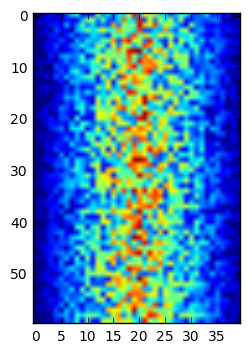

In [30]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.imshow(data)

Blue regions in this heat map are low values, while red shows high values.
As we can see,
inflammation rises and falls over a 40-day period.

> ## Some IPython magic
>
> If you're using an IPython / Jupyter notebook,
> you'll need to execute the following command
> in order for your matplotlib images to appear
> in the notebook:
>
> ```
> % matplotlib inline
> ```
>  
> The `%` indicates an IPython **magic function** -
> a function that is only valid within the notebook environment.
> Note that you only have to execute this function once per notebook.

Let's take a look at the average inflammation over time:

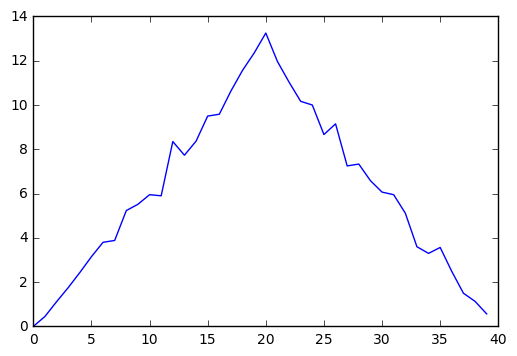

In [31]:
ave_inflammation = data.mean(axis=0)
plt.plot(ave_inflammation)

Here,
we have put the average per day across all patients in the variable `ave_inflammation`,
then asked `matplotlib.pyplot` to create and display a line graph of those values.
The result is roughly a linear rise and fall,
which is suspicious:
based on other studies,
we expect a sharper rise and slower fall.
Let's have a look at two other statistics:

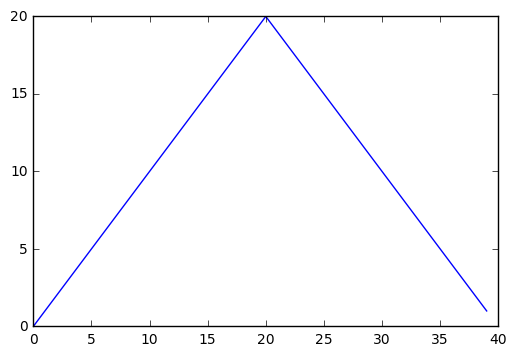

In [32]:
plt.plot(data.max(axis=0))

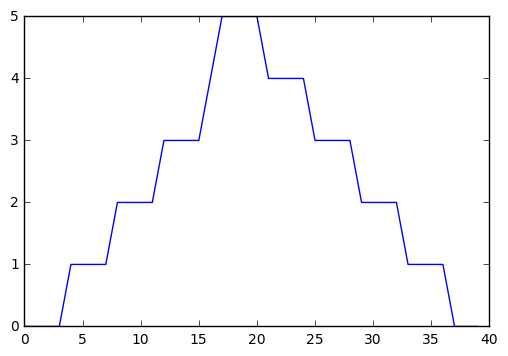

In [33]:
plt.plot(data.min(axis=0))

The maximum value rises and falls perfectly smoothly, while the minimum seems to be a step function. Neither result seems particularly likely, so either there's a mistake in our calculations or something is wrong with our data.

You can group similar plots in a single figure using subplots. This script below uses a number of new commands. The function `subplots(1, 3)` creates a space into which we will place all of our plots, specifying a layout of one row and three columns. The argument `figsize` tells Python how big to make this space. This function returns two things:

1. A `Figure` object
2. An array of `AxesSubplot` objects

Once the subplots are created, the axes are can be titled using the `set_xlabel()` method (or `set_ylabel()`). Here are our three plots side by side:

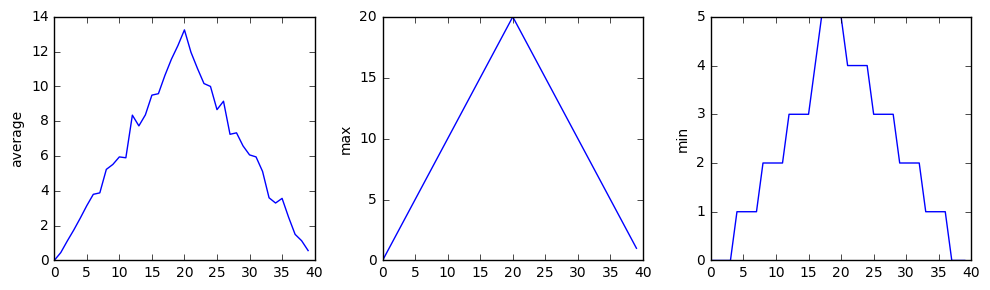

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(10,3))

axes[0].set_ylabel('average')
axes[0].plot(data.mean(axis=0))

axes[1].set_ylabel('max')
axes[1].plot(data.max(axis=0))

axes[2].set_ylabel('min')
axes[2].plot(data.min(axis=0))

fig.tight_layout();

The call to `loadtxt` reads our data,
and the rest of the program tells the plotting library
how large we want the figure to be,
that we're creating three sub-plots,
what to draw for each one,
and that we want a tight layout.
(Perversely,
if we leave out that call to `fig.tight_layout()`,
the graphs will actually be squeezed together more closely.)


### Exercise: Sorting out references

What does the following program print out?

```python
first, second = 'Grace', 'Hopper'
third, fourth = second, first
print(third, fourth)
```

### Exercise: Slicing strings

A section of an array is called a **slice**.
We can take slices of character strings as well:



In [35]:
element = 'oxygen'
print('first three characters:', element[:3])
print('last three characters:', element[3:6])

first three characters: oxy
last three characters: gen


What is the value of `element[:4]`?

What about `element[4:]`?

Or `element[:]`?

What is `element[-1]`?

What is `element[-2]`?

Given those answers,
explain what `element[1:-1]` does.

## Repeating Actions with Loops

Above, we wrote some code that plots some values of interest from our first inflammation dataset,
and reveals some suspicious features in it.

We have a dozen data sets right now, though, and more on the way.
We want to create plots for all of our data sets with a single statement.
To do that, we'll have to teach the computer how to repeat things.

An example task that we might want to repeat is printing each character in a
word on a line of its own. One way to do this would be to use a series of `print` statements:

In [36]:
word = 'lead'
print(word[0])
print(word[1])
print(word[2])
print(word[3])


l
e
a
d


This is a bad approach for two reasons:

1.  It doesn't scale:
    if we want to print the characters in a string that's hundreds of letters long,
    we'd be better off just typing them in.

1.  It's fragile:
    if we give it a longer string,
    it only prints part of the data,
    and if we give it a shorter one,
    it produces an error because we're asking for characters that don't exist.

In [37]:
word = 'tin'
print(word[0])
print(word[1])
print(word[2])
print(word[3])


t
i
n


IndexError: string index out of range

Here's a better approach:

In [38]:
word = 'lead'
for char in word:
    print(char)


l
e
a
d


This is shorter---certainly shorter than something that prints every character in a hundred-letter string---and
more robust as well:

In [39]:
word = 'oxygen'
for char in word:
    print(char)

o
x
y
g
e
n


The improved version of `print_characters` uses a `for` **loop**
to repeat an operation---in this case, printing---once for each thing in a collection.
The general form of a loop is:

```
for variable in collection:
    do things with variable
```

We can call the **loop variable** anything we like,
but there must be a colon at the end of the line starting the loop,
and we must indent anything we want to run inside the loop. Unlike many other languages, there is no
command to end a loop (e.g. end for); what is indented after the for statement belongs to the loop.

Here's another loop that repeatedly updates a variable:

In [40]:
length = 0
for vowel in 'aeiou':
    length = length + 1
print('There are', length, 'vowels')

There are 5 vowels


It's worth tracing the execution of this little program step by step.
Since there are five characters in `'aeiou'`,
the statement on line 3 will be executed five times.
The first time around,
`length` is zero (the value assigned to it on line 1)
and `vowel` is `'a'`.
The statement adds 1 to the old value of `length`,
producing 1,
and updates `length` to refer to that new value.
The next time around,
`vowel` is `'e'` and `length` is 1,
so `length` is updated to be 2.
After three more updates,
`length` is 5;
since there is nothing left in `'aeiou'` for Python to process,
the loop finishes
and the `print` statement on line 4 tells us our final answer.

Note that a loop variable is just a variable that's being used to record progress in a loop.
It still exists after the loop is over,
and we can re-use variables previously defined as loop variables as well:

In [41]:
letter = 'z'
for letter in 'abc':
    print(letter)
print('after the loop, letter is', letter)

a
b
c
after the loop, letter is c


Note also that finding the length of a string is such a common operation
that Python actually has a built-in function to do it called `len`:

In [42]:
len('aeiou')

5

`len` is much faster than any function we could write ourselves,
and much easier to read than a two-line loop;
it will also give us the length of many other things that we haven't met yet,
so we should always use it when we can.



### Exercise: Computing powers with loops

Exponentiation is built into Python:

In [43]:
5**3

125

Write a loop that calculates the same result as `5 ** 3` using
multiplication (and without exponentiation).

### Exercise: Reverse a string

Write a loop that takes a string,
and produces a new string with the characters in reverse order,
so `'Newton'` becomes `'notweN'`.

## Storing Multiple Values in Lists

Just as a `for` loop is a way to do operations many times,
a list is a way to store many values.
Unlike NumPy arrays,
lists are built into the language (so we don't have to load a library
to use them).
We create a list by putting values inside square brackets:

In [44]:
odds = [1, 3, 5, 7]
print('odds are:', odds)

odds are: [1, 3, 5, 7]


We select individual elements from lists by indexing them:

In [45]:
print('first and last:', odds[0], odds[-1])

first and last: 1 7


and if we loop over a list,
the loop variable is assigned elements one at a time:

In [46]:
for number in odds:
    print(number)

1
3
5
7


There is one important difference between lists and strings:
we can change the values in a list,
but we cannot change the characters in a string.
For example:

In [47]:
names = ['Newton', 'Darwing', 'Turing'] # typo in Darwin's name
print('names is originally:', names)
names[1] = 'Darwin' # correct the name
print('final value of names:', names)

names is originally: ['Newton', 'Darwing', 'Turing']
final value of names: ['Newton', 'Darwin', 'Turing']


works, but:

In [48]:
name = 'Bell'
name[0] = 'b'

TypeError: 'str' object does not support item assignment

does not.

> ## Ch-Ch-Ch-Changes
> 
> Data which can be modified in place is called **mutable**,
> while data which cannot be modified is called **immutable**.
> Strings and numbers are immutable. This does not mean that variables with string or number values are constants,
> but when we want to change the value of a string or number variable, we can only replace the old value 
> with a completely new value.
>
> Lists and arrays, on the other hand, are mutable: we can modify them after they have been created. We can 
> change individual elements, append new elements, or reorder the whole list.  For some operations, like 
> sorting, we can choose whether to use a function that modifies the data in place or a function that returns a 
> modified copy and leaves the original unchanged.
>
> Be careful when modifying data in place.  If two variables refer to the same list, and you modify the list 
> value, it will change for both variables! If you want variables with mutable values to be independent, you 
> must make a copy of the value when you assign it.
>
> Because of pitfalls like this, code which modifies data in place can be more difficult to understand. However, 
> it is often far more efficient to modify a large data structure in place than to create a modified copy for 
> every small change. You should consider both of these aspects when writing your code.

There are many ways to change the contents of lists besides assigning new values to
individual elements:

In [49]:
odds.append(11)
print('odds after adding a value:', odds)

odds after adding a value: [1, 3, 5, 7, 11]


In [50]:
del odds[0]
print('odds after removing the first element:', odds)

odds after removing the first element: [3, 5, 7, 11]


In [51]:
odds.reverse()
print('odds after reversing:', odds)

odds after reversing: [11, 7, 5, 3]


While modifying in place, it is useful to remember that python treats lists in a slightly counterintuitive way.

If we make a list and (attempt to) copy it then modify in place, we can cause all sorts of trouble:

In [52]:
odds = [1, 3, 5, 7]
primes = odds
primes += [2]
print('primes:', primes)
print('odds:', odds)

primes: [1, 3, 5, 7, 2]
odds: [1, 3, 5, 7, 2]


This is because python stores a list in memory, and then can use multiple names to refer to the same list.
If all we want to do is copy a (simple) list, we can index the values into a new list, so we do not modify a list we did not mean to:

In [53]:
odds = [1, 3, 5, 7]
# remember what this does!
primes = odds[:]
primes += [2]
print('primes:', primes)
print('odds:', odds)

primes: [1, 3, 5, 7, 2]
odds: [1, 3, 5, 7]


### Exercise: Turn a string into a list

Use a for-loop to convert the string "hello" into a list of letters:

In [54]:
["h", "e", "l", "l", "o"]

['h', 'e', 'l', 'l', 'o']

Hint: You can create an empty list like this:

In [55]:
my_list = []

### Tuples

If we wish to create an immutable, ordered sequence of elements, we can use a **tuple**. These elements may be of arbitrary and mixed types. The tuple is specified by a comma-separated sequence of items, enclosed by parentheses:

In [56]:
(34,90,56) # Tuple with three elements

(34, 90, 56)

In [57]:
(15,) # Tuple with one element

(15,)

In [58]:
(12, 'foobar') # Mixed tuple

(12, 'foobar')

As with lists, individual elements in a tuple can be accessed by indexing.

In [59]:
foo = (5, 7, 2, 8, 2, -1, 0, 4)
foo[4]

2

The `tuple` function can be used to cast any sequence into a tuple:

In [60]:
tuple('foobar')

('f', 'o', 'o', 'b', 'a', 'r')

## Dictionaries

One of the more flexible built-in data structures is the dictionary. A dictionary maps a collection of values to a set of associated keys. These mappings are mutable, and unlike lists or tuples, are **unordered**. Hence, rather than using the sequence index to return elements of the collection, the corresponding key must be used. Dictionaries are specified by a comma-separated sequence of keys and values, which are separated in turn by colons. The dictionary is enclosed by curly braces. 

For example:

In [61]:
my_dict = {'a':16, 
           'b':(4,5), 
           'foo':'''(noun) a term used as a universal substitute 
           for something real, especially when discussing technological ideas and 
           problems'''}

my_dict

{'a': 16,
 'b': (4, 5),
 'foo': '(noun) a term used as a universal substitute \n           for something real, especially when discussing technological ideas and \n           problems'}

In [62]:
my_dict['b']

(4, 5)

Notice that `a` indexes an integer, `b` a tuple, and `foo` a string. Hence, a dictionary is a sort of **associative array**. Some languages refer to such a structure as a **hash** or **key-value store**.
	
As with lists, being mutable, dictionaries have a variety of methods and functions that take dictionary arguments. For example, some dictionary functions include:

In [63]:
len(my_dict)

3

We can also check an object for membership in a dictionary using the `in` expression:

In [64]:
'a' in my_dict

True

Some useful dictionary methods are:

In [65]:
# Returns key/value pairs as list
my_dict.items() 

dict_items([('b', (4, 5)), ('foo', '(noun) a term used as a universal substitute \n           for something real, especially when discussing technological ideas and \n           problems'), ('a', 16)])

In [66]:
# Returns list of keys
my_dict.keys() 

dict_keys(['b', 'foo', 'a'])

In [67]:
# Returns list of values
my_dict.values() 

dict_values([(4, 5), '(noun) a term used as a universal substitute \n           for something real, especially when discussing technological ideas and \n           problems', 16])

When we try to index a value that does not exist, it raises a `KeyError`.

In [68]:
my_dict['c']

KeyError: 'c'

If we would rather not get the error, we can use the `get` method, which returns `None` if the value is not present.

In [69]:
my_dict.get('c')

Custom return values can be specified with a second argument.

In [70]:
my_dict.get('c', -1)

-1

It is easy to remove items from a dictionary.

In [71]:
my_dict.popitem()

('b', (4, 5))

In [72]:
my_dict

{'a': 16,
 'foo': '(noun) a term used as a universal substitute \n           for something real, especially when discussing technological ideas and \n           problems'}

In [73]:
my_dict.clear()

In [74]:
my_dict

{}

## Analyzing Data from Multiple Files

We now have almost everything we need to process all our data files.
The only thing that's missing is a library with a rather unpleasant name:

In [75]:
import glob

The `glob` library contains a single function, also called `glob`,
that finds files whose names match a pattern.
We provide those patterns as strings:
the character `*` matches zero or more characters,
while `?` matches any one character.
We can use this to get the names of all the HTML files in the current directory:

In [76]:
from glob import glob

glob('*.html')

[]

As these examples show,
`glob.glob`'s result is a list of strings,
which means we can loop over it
to do something with each filename in turn.
In our case,
the "something" we want to do is generate a set of plots for each file in our inflammation dataset.
Let's test it by analyzing the first three files in the list:

In [77]:
filenames = glob('data/inflammation*.csv')
filenames = filenames[0:3]

for f in filenames:
    print(f)

    data = numpy.loadtxt(fname=f, delimiter=',')

    fig = plt.figure(figsize=(10.0, 3.0))

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    axes1.set_ylabel('average')
    axes1.plot(data.mean(axis=0))

    axes2.set_ylabel('max')
    axes2.plot(data.max(axis=0))

    axes3.set_ylabel('min')
    axes3.plot(data.min(axis=0))

    fig.tight_layout()


Sure enough,
the maxima of the first two data sets show exactly the same ramp as the first,
and their minima show the same staircase structure;
a different situation has been revealed in the third dataset,
where the maxima are a bit less regular, but the minima are consistently zero.


# Conditionals

We can ask Python to take different actions, depending on a condition, with an if statement:

In [78]:
num = 37
if num > 100:
    print('greater')
else:
    print('not greater')
print('done')

not greater
done


The second line of this code uses the keyword `if` to tell Python that we want to make a choice.
If the test that follows the `if` statement is true,
the body of the `if`
(i.e., the lines indented underneath it) are executed.
If the test is false,
the body of the `else` is executed instead.
Only one or the other is ever executed:

![Executing a Conditional](images/python-flowchart-conditional.svg)

Conditional statements don't have to include an `else`.
If there isn't one,
Python simply does nothing if the test is false:

In [79]:
num = 53
print('before conditional...')
if num > 100:
    print('53 is greater than 100')
print('...after conditional')

before conditional...
...after conditional


We can also chain several tests together using `elif`,
which is short for "else if".
The following Python code uses `elif` to print the sign of a number.

In [80]:
num = -3

if num > 0:
    print(num, "is positive")
elif num == 0:
    print(num, "is zero")
else:
    print(num, "is negative")

-3 is negative


One important thing to notice in the code above is that we use a double equals sign `==` to test for equality
rather than a single equals sign
because the latter is used to mean **assignment**.

We can also combine tests using `and` and `or`.
`and` is only true if both parts are true:

In [81]:
if (1 > 0) and (-1 > 0):
    print('both parts are true')
else:
    print('at least one part is not true')

at least one part is not true


while `or` is true if at least one part is true:

In [82]:
if (1 < 0) or (-1 < 0):
    print('at least one test is true')

at least one test is true


## Checking our Data

Now that we've seen how conditionals work,
we can use them to check for the suspicious features we saw in our inflammation data.
In the first couple of plots, the maximum inflammation per day
seemed to rise like a straight line, one unit per day.
We can check for this inside the `for` loop we wrote with the following conditional:

```python
if data.max(axis=0)[0] == 0 and data.max(axis=0)[20] == 20:
    print('Suspicious looking maxima!')
```

We also saw a different problem in the third dataset;
the minima per day were all zero (looks like a healthy person snuck into our study).
We can also check for this with an `elif` condition:

```python
elif data.min(axis=0).sum() == 0:
    print('Minima add up to zero!')
```

And if neither of these conditions are true, we can use `else` to give the all-clear:

```python
else:
    print('Seems OK!')
```

Let's test that out:

In [83]:
data = numpy.loadtxt(fname='../data/inflammation-01.csv', delimiter=',')

if data.max(axis=0)[0] == 0 and data.max(axis=0)[20] == 20:
    print('Suspicious looking maxima!')
elif data.min(axis=0).sum() == 0:
    print('Minima add up to zero!')
else:
    print('Seems OK!')

Suspicious looking maxima!


In [84]:
data = numpy.loadtxt(fname='../data/inflammation-03.csv', delimiter=',')

if data.max(axis=0)[0] == 0 and data.max(axis=0)[20] == 20:
    print('Suspicious looking maxima!')
elif data.min(axis=0).sum() == 0:
    print('Minima add up to zero!')
else:
    print('Seems OK!')

Minima add up to zero!


In this way,
we have asked Python to do something different depending on the condition of our data.
Here we printed messages in all cases,
but we could also imagine not using the `else` catch-all
so that messages are only printed when something is wrong,
freeing us from having to manually examine every plot for features we've seen before.

## What is truth?

`True` and `False` are special words in Python called `booleans` which represent true
and false statements. However, they aren't the only values in Python that are true and false.
In fact, *any* value can be used in an `if` or `elif`.
After reading and running the code below,
explain what the rule is for which values are considered true and which are considered false.

In [85]:
if '':
    print('empty string is true')
if 'word':
    print('word is true')
if []:
    print('empty list is true')
if [1, 2, 3]:
    print('non-empty list is true')
if 0:
    print('zero is true')
if 1:
    print('one is true')

word is true
non-empty list is true
one is true


## In-place operators

Python (and most other languages in the C family) provides **in-place operators**
that work like this:

In [86]:
x = 1  # original value
x += 1 # add one to x, assigning result back to x
x *= 3 # multiply x by 3

x

6

## Writing Functions

At this point,
we've written code to draw some interesting features in our inflammation data,
loop over all our data files to quickly draw these plots for each of them,
and have Python make decisions based on what it sees in our data.
But, our code is getting pretty long and complicated;
what if we had thousands of datasets,
and didn't want to generate a figure for every single one?
Commenting out the figure-drawing code is a nuisance.
Also, what if we want to use that code again,
on a different dataset or at a different point in our program?
Cutting and pasting it is going to make our code get very long and very repetative,
very quickly.
We'd like a way to package our code so that it is easier to reuse,
and Python provides for this by letting us define things called **functions** -
a shorthand way of re-executing longer pieces of code.

Let's start by defining a function `fahr_to_kelvin` that converts temperatures from Fahrenheit to Kelvin:

In [87]:
def fahr_to_kelvin(temp):
    return ((temp - 32) * (5/9)) + 273.15

The function definition opens with the word `def`,
which is followed by the name of the function
and a parenthesized list of parameter names.
The **body** of the function --- the
statements that are executed when it runs --- is indented below the definition line,
typically by four spaces.

When we call the function,
the values we pass to it are assigned to those variables
so that we can use them inside the function.
Inside the function,
we use a **return statement** to send a result back to whoever asked for it.

Let's try running our function.
Calling our own function is no different from calling any other function:

In [88]:
print('freezing point of water:', fahr_to_kelvin(32))
print('boiling point of water:', fahr_to_kelvin(212))

freezing point of water: 273.15
boiling point of water: 373.15


We've successfully called the function that we defined,
and we have access to the value that we returned.

> ## Integer division
>
> We are using Python 3, where division always returns a floating point number:
>
> ```
> $ python3 -c "print(5/9)"
> ```
> ```
> 0.5555555555555556
> ```
>
> Unfortunately, this wasn't the case in Python 2:
>
> ```
> >>> 5/9
> ```
> ```
> 0
> ```
>
> If you are using Python 2 and want to keep the fractional part of division
> you need to convert one or the other number to floating point:
>
> ```
> >>> 5.0/9
> ```
> ```
> 0.555555555556
> ```
> ```
> >>> 5/9.0
> ```
> ```
> 0.555555555556
> ```
>
> And if you want an integer result from division in Python 3,
> use a double-slash:
> ```
> >>> 3//2
> ```
> ```
> 1
> ```

## Composing Functions

Now that we've seen how to turn Fahrenheit into Kelvin,
it's easy to turn Kelvin into Celsius:

In [89]:
def kelvin_to_celsius(temp):
    return temp - 273.15

print('absolute zero in Celsius:', kelvin_to_celsius(0.0))

absolute zero in Celsius: -273.15


What about converting Fahrenheit to Celsius?
We could write out the formula,
but we don't need to.
Instead,
we can **compose** the required function, based on the two functions we have already created:

In [90]:
def fahr_to_celsius(temp):
    temp_k = fahr_to_kelvin(temp)
    result = kelvin_to_celsius(temp_k)
    return result

print('freezing point of water in Celsius:', fahr_to_celsius(32.0))

freezing point of water in Celsius: 0.0


This is our first taste of how larger programs are built:
we define basic operations,
then combine them in ever-large chunks to get the effect we want.
Real-life functions will usually be larger than the ones shown here --- typically half a dozen to a few dozen lines --- but
they shouldn't ever be much longer than that,
or the next person who reads it won't be able to understand what's going on.

## Tidying up

Now that we know how to wrap bits of code up in functions,
we can make our inflammation analyasis easier to read and easier to reuse.
First, let's make an `analyze` function that generates our plots:

In [91]:
def analyze(filename):

    data = numpy.loadtxt(fname=filename, delimiter=',')

    fig = plt.figure(figsize=(10.0, 3.0))

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    axes1.set_ylabel('average')
    axes1.plot(data.mean(axis=0))

    axes2.set_ylabel('max')
    axes2.plot(data.max(axis=0))
    axes2.set_title(filename[:-4])

    axes3.set_ylabel('min')
    axes3.plot(data.min(axis=0))

    fig.tight_layout()

and another function called `detect_problems` that checks for those systematics
we noticed:

In [92]:
def detect_problems(filename):

    data = numpy.loadtxt(fname=filename, delimiter=',')

    if data.max(axis=0)[0] == 0 and data.max(axis=0)[20] == 20:
        print('Suspicious looking maxima!')
    elif data.min(axis=0).sum() == 0:
        print('Minima add up to zero!')
    else:
        print('Seems OK!')

Notice that rather than jumbling this code together in one giant `for` loop,
we can now read and reuse both ideas separately.
We can reproduce the previous analysis with a much simpler `for` loop:

In [93]:
for f in filenames[:3]:
    
    print('\nOpening file', f)
    analyze(f)
    detect_problems(f)

By giving our functions human-readable names,
we can more easily read and understand what is happening in the `for` loop.
Even better, if at some later date we want to use either of those pieces of code again,
we can do so in a single line.

## Testing and Documenting

Once we start putting things in functions so that we can re-use them,
we need to start testing that those functions are working correctly.
To see how to do this,
let's write a function to center a dataset around a particular value:

In [94]:
def center(data, desired):
    return (data - data.mean()) + desired

We could test this on our actual data,
but since we don't know what the values ought to be,
it will be hard to tell if the result was correct.
Instead,
let's use NumPy to create a matrix of 0's
and then center that around 3:

In [95]:
z = numpy.zeros((2,2))
print(center(z, 3))

[[ 3.  3.]
 [ 3.  3.]]


That looks right,
so let's try `center` on our real data:

In [96]:
data = numpy.loadtxt(fname='../data/inflammation-01.csv', delimiter=',')
print(center(data, 0))

[[-6.14875 -6.14875 -5.14875 ..., -3.14875 -6.14875 -6.14875]
 [-6.14875 -5.14875 -4.14875 ..., -5.14875 -6.14875 -5.14875]
 [-6.14875 -5.14875 -5.14875 ..., -4.14875 -5.14875 -5.14875]
 ..., 
 [-6.14875 -5.14875 -5.14875 ..., -5.14875 -5.14875 -5.14875]
 [-6.14875 -6.14875 -6.14875 ..., -6.14875 -4.14875 -6.14875]
 [-6.14875 -6.14875 -5.14875 ..., -5.14875 -5.14875 -6.14875]]


It's hard to tell from the default output whether the result is correct,
but there are a few simple tests that will reassure us:

In [97]:
print('original min, mean, and max are:', data.min(), data.mean(), data.max())
centered = center(data, 0)
print('min, mean, and and max of centered data are:', centered.min(), centered.mean(), centered.max())

original min, mean, and max are: 0.0 6.14875 20.0
min, mean, and and max of centered data are: -6.14875 2.84217094304e-16 13.85125


That seems almost right:
the original mean was about 6.1,
so the lower bound from zero is how about -6.1.
The mean of the centered data isn't quite zero --- we'll explore why not in the challenges --- but it's pretty close.
We can even go further and check that the standard deviation hasn't changed:

In [98]:
print('std dev before and after:', data.std(), centered.std())

std dev before and after: 4.61383319712 4.61383319712


Those values look the same,
but we probably wouldn't notice if they were different in the sixth decimal place.
Let's do this instead:

In [99]:
print('difference in standard deviations before and after:', data.std() - centered.std())

difference in standard deviations before and after: 0.0


Again,
the difference is very small.
It's still possible that our function is wrong,
but it seems unlikely enough that we should probably get back to doing our analysis.
We have one more task first, though:
we should write some **documentation** for our function
to remind ourselves later what it's for and how to use it.

The usual way to put documentation in software is to add **comments** like this:

In [100]:
# center(data, desired): return a new array containing the original data centered around the desired value.
def center(data, desired):
    return (data - data.mean()) + desired

There's a better way, though.
If the first thing in a function is a string that isn't assigned to a variable,
that string is attached to the function as its documentation:

In [101]:
def center(data, desired):
    '''Return a new array containing the original data centered around the desired value.'''
    return (data - data.mean()) + desired

This is better because we can now ask Python's built-in help system to show us the documentation for the function:

In [102]:
help(center)

Help on function center in module __main__:

center(data, desired)
    Return a new array containing the original data centered around the desired value.



A string like this is called a **docstring**.
We don't need to use triple quotes when we write one,
but if we do,
we can break the string across multiple lines:

In [103]:
def center(data, desired):
    '''Return a new array containing the original data centered around the desired value.
    Example: center([1, 2, 3], 0) => [-1, 0, 1]'''
    return (data - data.mean()) + desired

help(center)

Help on function center in module __main__:

center(data, desired)
    Return a new array containing the original data centered around the desired value.
    Example: center([1, 2, 3], 0) => [-1, 0, 1]



## Defining Defaults

We have passed parameters to functions in two ways:
directly, as in `type(data)`,
and by name, as in `numpy.loadtxt(fname='something.csv', delimiter=',')`.
In fact,
we can pass the filename to `loadtxt` without the `fname=`:

In [104]:
numpy.loadtxt('../data/inflammation-01.csv', delimiter=',')

array([[ 0.,  0.,  1., ...,  3.,  0.,  0.],
       [ 0.,  1.,  2., ...,  1.,  0.,  1.],
       [ 0.,  1.,  1., ...,  2.,  1.,  1.],
       ..., 
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  0.,  0., ...,  0.,  2.,  0.],
       [ 0.,  0.,  1., ...,  1.,  1.,  0.]])

but we still need to say `delimiter=`:

In [105]:
numpy.loadtxt('../data/inflammation-01.csv', ',')

TypeError: data type "," not understood

To understand what's going on,
and make our own functions easier to use,
let's re-define our `center` function like this:

In [106]:
def center(data, desired=0.0):
    '''Return a new array containing the original data centered around the desired value (0 by default).
    Example: center([1, 2, 3], 0) => [-1, 0, 1]'''
    return (data - data.mean()) + desired

The key change is that the second parameter is now written `desired=0.0` instead of just `desired`.
If we call the function with two arguments,
it works as it did before:

In [107]:
test_data = numpy.zeros((2, 2))
print(center(test_data, 3))

[[ 3.  3.]
 [ 3.  3.]]


But we can also now call it with just one parameter,
in which case `desired` is automatically assigned the **default value** of 0.0:

In [108]:
more_data = 5 + numpy.zeros((2, 2))
print('data before centering:')
print(more_data)
print('centered data:')
print(center(more_data))

data before centering:
[[ 5.  5.]
 [ 5.  5.]]
centered data:
[[ 0.  0.]
 [ 0.  0.]]


This is handy:
if we usually want a function to work one way,
but occasionally need it to do something else,
we can allow people to pass a parameter when they need to
but provide a default to make the normal case easier.
The example below shows how Python matches values to parameters:

In [109]:
def display(a=1, b=2, c=3):
    print('a:', a, 'b:', b, 'c:', c)

print('no parameters:')
display()
print('one parameter:')
display(55)
print('two parameters:')
display(55, 66)

no parameters:
a: 1 b: 2 c: 3
one parameter:
a: 55 b: 2 c: 3
two parameters:
a: 55 b: 66 c: 3


As this example shows,
parameters are matched up from left to right,
and any that haven't been given a value explicitly get their default value.
We can override this behavior by naming the value as we pass it in:

In [110]:
print('only setting the value of c')
display(c=77)

only setting the value of c
a: 1 b: 2 c: 77


With that in hand,
let's look at the help for `numpy.loadtxt`:

In [111]:
help(numpy.loadtxt)

Help on function loadtxt in module numpy.lib.npyio:

loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0)
    Load data from a text file.
    
    Each row in the text file must have the same number of values.
    
    Parameters
    ----------
    fname : file or str
        File, filename, or generator to read.  If the filename extension is
        ``.gz`` or ``.bz2``, the file is first decompressed. Note that
        generators should return byte strings for Python 3k.
    dtype : data-type, optional
        Data-type of the resulting array; default: float.  If this is a
        structured data-type, the resulting array will be 1-dimensional, and
        each row will be interpreted as an element of the array.  In this
        case, the number of columns used must match the number of fields in
        the data-type.
    comments : str or sequence, optional
        The characters or list of characters us

There's a lot of information here,
but the most important part is the first couple of lines:

    loadtxt(fname, dtype=<type 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None,
        unpack=False, ndmin=0)

This tells us that `loadtxt` has one parameter called `fname` that doesn't have a default value,
and eight others that do.
If we call the function like this:

In [112]:
numpy.loadtxt('../data/inflammation-01.csv', ',')

TypeError: data type "," not understood

then the filename is assigned to `fname` (which is what we want),
but the delimiter string `','` is assigned to `dtype` rather than `delimiter`,
because `dtype` is the second parameter in the list. However ',' isn't a known `dtype` so
our code produced an error message when we tried to run it.
When we call `loadtxt` we don't have to provide `fname=` for the filename because it's the
first item in the list, but if we want the ',' to be assigned to the variable `delimiter`,
we *do* have to provide `delimiter=` for the second parameter since `delimiter` is not
the second parameter in the list.





### Exercise: Combining strings 

"Adding" two strings produces their concatenation:
`'a' + 'b'` is `'ab'`.
Write a function called `fence` that takes two parameters called `original` and `wrapper`
and returns a new string that has the wrapper character at the beginning and end of the original.
A call to your function should look like this:

```
print(fence('name', '*'))
```
```
*name*
```

### Exercise: Rescaling an array 

Write a function `rescale` that takes an array as input
and returns a corresponding array of values scaled to lie in the range 0.0 to 1.0.

### Exercise: Variables inside and outside functions 

What does the following piece of code display when run - and why?

In [113]:
f = 0
k = 0

def f2k(f):
  k = ((f-32)*(5.0/9.0)) + 273.15
  return k

f2k(8)
f2k(41)
f2k(32)

print(k)

0


## Errors and Exceptions

Every programmer encounters errors,
both those who are just beginning,
and those who have been programming for years.
Encountering errors and exceptions can be very frustrating at times,
and can make coding feel like a hopeless endeavour.
However,
understanding what the different types of errors are
and when you are likely to encounter them can help a lot.
Once you know *why* you get certain types of errors,
they become much easier to fix.

Errors in Python have a very specific form,
called a traceback.

Let's examine one:

In [114]:
import errors_01
errors_01.favorite_ice_cream()

ImportError: No module named 'errors_01'

This particular traceback has two levels.
You can determine the number of levels by looking for the number of arrows on the left hand side.
In this case:

1.  The first shows code from the cell above,
    with an arrow pointing to Line 2 (which is `favorite_ice_cream()`).

2.  The second shows some code in another function (`favorite_ice_cream`, located in the file `errors_01.py`),
    with an arrow pointing to Line 7 (which is `print(ice_creams[3])`).

The last level is the actual place where the error occurred.
The other level(s) show what function the program executed to get to the next level down.
So, in this case, the program first performed a **function call** to the function `favorite_ice_cream`.
Inside this function,
the program encountered an error on Line 7, when it tried to run the code `print(ice_creams[3])`.

> ## Long Tracebacks
>
> Sometimes, you might see a traceback that is very long -- sometimes they might even be 20 levels deep!
> This can make it seem like something horrible happened,
> but really it just means that your program called many functions before it ran into the error.
> Most of the time,
> you can just pay attention to the bottom-most level,
> which is the actual place where the error occurred.

So what error did the program actually encounter?
In the last line of the traceback,
Python helpfully tells us the category or type of error (in this case, it is an `IndexError`)
and a more detailed error message (in this case, it says "list index out of range").

If you encounter an error and don't know what it means,
it is still important to read the traceback closely.
That way,
if you fix the error,
but encounter a new one,
you can tell that the error changed.
Additionally,
sometimes just knowing *where* the error occurred is enough to fix it,
even if you don't entirely understand the message.

If you do encounter an error you don't recognize,
try looking at the [official documentation on errors](http://docs.python.org/2/library/exceptions.html).
However,
note that you may not always be able to find the error there,
as it is possible to create custom errors.
In that case,
hopefully the custom error message is informative enough to help you figure out what went wrong.

## Syntax Errors

When you forget a colon at the end of a line,
accidentally add one space too many when indenting under an `if` statement,
or forget a parentheses,
you will encounter a **syntax error**.
This means that Python couldn't figure out how to read your program.
This is similar to forgetting punctuation in English:

> this text is difficult to read there is no punctuation there is also no capitalization
> why is this hard because you have to figure out where each sentence ends
> you also have to figure out where each sentence begins
> to some extent it might be ambiguous if there should be a sentence break or not

People can typically figure out what is meant by text with no punctuation,
but people are much smarter than computers.
If Python doesn't know how to read the program,
it will just give up and inform you with an error.
For example:

In [115]:
def some_function()
    msg = "hello, world!"
    print(msg)
     return msg

SyntaxError: invalid syntax (<ipython-input-115-dbf32ad5d3e8>, line 1)

Here, Python tells us that there is a `SyntaxError` on line 1,
and even puts a little arrow in the place where there is an issue.
In this case the problem is that the function definition is missing a colon at the end.

Actually, the function above has *two* issues with syntax.
If we fix the problem with the colon,
we see that there is *also* an `IndentationError`,
which means that the lines in the function definition do not all have the same indentation:

In [116]:
def some_function():
    msg = "hello, world!"
    print(msg)
     return msg

IndentationError: unexpected indent (<ipython-input-116-e169556d667b>, line 4)

Both `SyntaxError` and `IndentationError` indicate a problem with the syntax of your program,
but an `IndentationError` is more specific:
it *always* means that there is a problem with how your code is indented.

> ## Tabs and Spaces
>
> A quick note on indentation errors:
> they can sometimes be insidious,
> especially if you are mixing spaces and tabs.
> Because they are both whitespace,
> it is difficult to visually tell the difference.
> The IPython notebook actually gives us a bit of a hint,
> but not all Python editors will do that.
> In the following example,
> the first two lines are using a tab for indentation,
> while the third line uses four spaces:
>
> ```python
> def some_function():
>     msg = "hello, world!"
>     print(msg)
>     return msg
> ```
> ```
>   File "<ipython-input-5-653b36fbcd41>", line 4
>     return msg
>               ^
> IndentationError: unindent does not match any outer indentation level
> ```
>
> By default, one tab is equivalent to eight spaces,
> so the only way to mix tabs and spaces is to make it look like this.
> In general, is is better to just never use tabs and always use spaces,
> because it can make things very confusing.

## Variable Name Errors

Another very common type of error is called a `NameError`,
and occurs when you try to use a variable that does not exist.
For example:

In [117]:
print(a)

NameError: name 'a' is not defined

Variable name errors come with some of the most informative error messages,
which are usually of the form "name 'the_variable_name' is not defined".

Why does this error message occur?
That's harder question to answer,
because it depends on what your code is supposed to do.
However,
there are a few very common reasons why you might have an undefined variable.
The first is that you meant to use a string, but forgot to put quotes around it:

In [118]:
print(hello)

NameError: name 'hello' is not defined

The second is that you just forgot to create the variable before using it.
In the following example,
`count` should have been defined (e.g., with `count = 0`) before the for loop:

In [119]:
for number in range(10):
    count = count + number
print("The count is: " + str(count))

NameError: name 'count' is not defined

Finally, the third possibility is that you made a typo when you were writing your code.
Let's say we fixed the error above by adding the line `Count = 0` before the for loop.
Frustratingly, this actually does not fix the error.
Remember that variables are **case-sensitive**,
so the variable `count` is different from `Count`. We still get the same error, because we still have not defined `count`:

In [120]:
Count = 0
for number in range(10):
    count = count + number
print("The count is: " + str(count))

NameError: name 'count' is not defined

## Item Errors

Next up are errors having to do with containers (like lists and dictionaries) and the items within them.
If you try to access an item in a list or a dictionary that does not exist,
then you will get an error.
This makes sense:
if you asked someone what day they would like to get coffee,
and they answered "caturday",
you might be a bit annoyed.
Python gets similarly annoyed if you try to ask it for an item that doesn't exist:

In [121]:
letters = ['a', 'b', 'c']
print("Letter #1 is " + letters[0])
print("Letter #2 is " + letters[1])
print("Letter #3 is " + letters[2])
print("Letter #4 is " + letters[3])

Letter #1 is a
Letter #2 is b
Letter #3 is c


IndexError: list index out of range

If you get an error that you've never seen before,
searching the Internet for that error type
often reveals common reasons why you might get that error.

---

## References

Much of the content for this notebook was created by [Software Carpentry](http://software-carpentry.org/lessons.html). Here are some additional resources if you wish to continue learning Python:

- Bassi S (2007) [A Primer on Python for Life Science Researchers](http://www.ploscompbiol.org/article/info%3Adoi%2F10.1371%2Fjournal.pcbi.0030199). PLoS Comput Biol 3(11): e199
- [Learn Python the Hard Way](http://learnpythonthehardway.org/book/)
- [Learn X in Y Minutes (where X=Python)](http://learnxinyminutes.com/docs/python/)